In [1]:
import sys
sys.path.append("..")

In [2]:
from train_autoencoder import *
from test_autoencoder import *

In [3]:
from C2D_Models import *
from PatchWise.models_PatchWise import *

In [4]:
models = [
    PatchWise_C2D(channels = 1)
         ]

model_names = [
    "C2D_3x3_Patch_2xE",
]

model_names = [join_paths(["C2D_AE_models/128/patched/", mn+"_MSE_UCSD2"]) for mn in model_names]    

# Training

In [5]:
optimizers = [ADAM(m) for m in models]
losses = [MSE_LOSS() for m in models]

In [6]:
train_data = UCSD(2)

16it [00:02,  7.26it/s]


In [7]:
train_loader, val_loader = get_data_loaders(train_data, batch_size=64)

In [8]:
trainer = AutoEncoder_Trainer(
    models,
    model_names,
    train_loader, 
    val_loader,
    optimizers,
    losses,
    epochs = 300
)

Estimated Time 3.77 hours | Will be completed by 2020-11-17 19:39:
------------------------------------------------------------
Epoch: [001/300] | time/epoch: 45.40 seconds
------------------------------------------------------------
Model: C2D_AE_models/128/patched/C2D_3x3_Patch_2xE_MSE_UCSD2/C2D_3x3_Patch_2xE_MSE_UCSD2.pth.tar
                Loss
Training    0.111519
Validation  0.091139
----------------------------------------
------------------------------------------------------------
Epoch: [002/300] | time/epoch: 52.57 seconds
------------------------------------------------------------
Model: C2D_AE_models/128/patched/C2D_3x3_Patch_2xE_MSE_UCSD2/C2D_3x3_Patch_2xE_MSE_UCSD2.pth.tar
                Loss
Training    0.069844
Validation  0.062193
----------------------------------------
------------------------------------------------------------
Epoch: [003/300] | time/epoch: 51.79 seconds
------------------------------------------------------------
Model: C2D_AE_models/128/patch

['C2D_AE_models/128/patched/C2D_3x3_Patch_2xE_MSE_UCSD2']

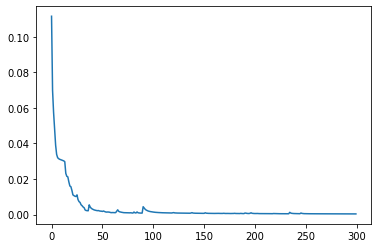

In [9]:
trainer.train()

In [10]:
for ae_model in trainer.autoencoder_models:
    save_model(ae_model.model, ae_model.model_file)

In [11]:
print("Training done")

Training done


# Testing

In [12]:
test_data = UCSD(2, isTrain=False, sample_stride = 1)

12it [00:01,  6.35it/s]


In [13]:
for ae_model in trainer.autoencoder_models:
    print("-"*40)
    print(ae_model.model_file)
    tester = AutoEncoder_Tester(
        ae_model.model,
        test_data,
        patchwise = True
    )
    results = tester.test(save_as = ".pkl".join(ae_model.model_file.split(".pth.tar")))
    print("="*40)

0it [00:00, ?it/s]

----------------------------------------
C2D_AE_models/128/patched/C2D_3x3_Patch_2xE_MSE_UCSD2/C2D_3x3_Patch_2xE_MSE_UCSD2.pth.tar


7it [00:26,  3.85s/it]

Abs ROC-AUC: Only one class present in y_true. ROC AUC score is not defined in that case.
Sqr ROC-AUC: Only one class present in y_true. ROC AUC score is not defined in that case.


8it [00:30,  3.81s/it]

Abs ROC-AUC: Only one class present in y_true. ROC AUC score is not defined in that case.
Sqr ROC-AUC: Only one class present in y_true. ROC AUC score is not defined in that case.


9it [00:33,  3.48s/it]

Abs ROC-AUC: Only one class present in y_true. ROC AUC score is not defined in that case.
Sqr ROC-AUC: Only one class present in y_true. ROC AUC score is not defined in that case.


10it [00:36,  3.43s/it]

Abs ROC-AUC: Only one class present in y_true. ROC AUC score is not defined in that case.
Sqr ROC-AUC: Only one class present in y_true. ROC AUC score is not defined in that case.


12it [00:44,  3.71s/it]


AUC-ROC Score of  OneClassSVM: 0.5135611130679817
-------------------- TEST RESULTS --------------------
absolute_ROC_AUC_Score :
 0.8792548554637264
squared_ROC_AUC_Score :
 0.8043932458434301
aggregated_absolute_ROC_AUC_Score :
 0.654404719971821
aggregated_square_ROC_AUC_Score :
 0.6670940471997182
abs_report :
               precision    recall  f1-score   support

           0       0.84      0.50      0.63      1670
           1       0.18      0.54      0.27       340

    accuracy                           0.51      2010
   macro avg       0.51      0.52      0.45      2010
weighted avg       0.73      0.51      0.57      2010

sqr_report :
               precision    recall  f1-score   support

           0       0.84      0.50      0.63      1670
           1       0.18      0.54      0.27       340

    accuracy                           0.51      2010
   macro avg       0.51      0.52      0.45      2010
weighted avg       0.73      0.51      0.57      2010

---------------

<Figure size 432x288 with 0 Axes>

In [14]:
# del test_data
test_data = UCSD(2, isTrain=False, sample_stride = 1, useCorrectedAnnotations = False)

12it [00:01,  6.95it/s]


In [15]:
for ae_model in trainer.autoencoder_models:
    print("-"*40)
    print(ae_model.model_file)
    tester = AutoEncoder_Tester(
        ae_model.model,
        test_data,
        patchwise = True
    )
    results = tester.test(save_as = ".pkl".join(ae_model.model_file.split(".pth.tar")))
    print("="*40)

0it [00:00, ?it/s]

----------------------------------------
C2D_AE_models/128/patched/C2D_3x3_Patch_2xE_MSE_UCSD2/C2D_3x3_Patch_2xE_MSE_UCSD2.pth.tar


7it [00:26,  3.75s/it]

Abs ROC-AUC: Only one class present in y_true. ROC AUC score is not defined in that case.
Sqr ROC-AUC: Only one class present in y_true. ROC AUC score is not defined in that case.


8it [00:30,  3.83s/it]

Abs ROC-AUC: Only one class present in y_true. ROC AUC score is not defined in that case.
Sqr ROC-AUC: Only one class present in y_true. ROC AUC score is not defined in that case.


9it [00:33,  3.51s/it]

Abs ROC-AUC: Only one class present in y_true. ROC AUC score is not defined in that case.
Sqr ROC-AUC: Only one class present in y_true. ROC AUC score is not defined in that case.


10it [00:36,  3.43s/it]

Abs ROC-AUC: Only one class present in y_true. ROC AUC score is not defined in that case.
Sqr ROC-AUC: Only one class present in y_true. ROC AUC score is not defined in that case.


12it [00:44,  3.69s/it]


AUC-ROC Score of  OneClassSVM: 0.5330854744408089
-------------------- TEST RESULTS --------------------
absolute_ROC_AUC_Score :
 0.8785765145587456
squared_ROC_AUC_Score :
 0.8040119808502824
aggregated_absolute_ROC_AUC_Score :
 0.6804380330418923
aggregated_square_ROC_AUC_Score :
 0.6887437644155983
abs_report :
               precision    recall  f1-score   support

           0       0.84      0.51      0.63      1648
           1       0.20      0.57      0.30       362

    accuracy                           0.52      2010
   macro avg       0.52      0.54      0.47      2010
weighted avg       0.73      0.52      0.57      2010

sqr_report :
               precision    recall  f1-score   support

           0       0.84      0.51      0.63      1648
           1       0.20      0.57      0.30       362

    accuracy                           0.52      2010
   macro avg       0.52      0.54      0.47      2010
weighted avg       0.73      0.52      0.57      2010

--------------

<Figure size 432x288 with 0 Axes>

In [16]:
exit()